# Climate Change and The Federal Government: On Track to Net Zero?

## Parsa Zahraei Mohammadabady
## 100749173

##### Note

On November 25th 2022, the webpage on which this dataset was sourced from was updated to include data for the fiscal year 2021-2022. As this project was nearing completion when this update occured, it will only cover data up to the fiscal year 2020-2021. An archived link to the webpage has been provided in the introduction. The current webpage can be found __[here](https://open.canada.ca/data/en/dataset/6bed41cd-9816-4912-a2b8-b0b224909396)__

## Introduction

Climate change is one of the foremost issues facing the world today. As Canadians, climate change presents several risks to our environment and way of life, including an increase in frequency of extreme weather events, rising sea levels and hotter weather ("Climate Change", 2022). The most effective method to mitigate climate change is to reduce green house emissions ("Climate Change Change", 2022). To address the threat of climate change, the Government of Canada has committed to achieving net-zero emissions by 2050. On the webpage about this goal, the term net-zero emissions is defined as the state where the economy produces no emissions or that emissions are offset ("Net-Zero Emissions", 2022). Efforts to achieve net-zero must also consider the emissions the Government itself produces in its operations. Fortunately, the Government of Canada is committed to bring the emissions of its own operations to net-zero. 
    
The Government of Canada tracks its green house gas emissions across 27 departments and agencies. This set of data, titled __[Government of Canada’s Greenhouse Gas Emissions Inventory](https://web.archive.org/web/20220713063311/https://open.canada.ca/data/en/dataset/6bed41cd-9816-4912-a2b8-b0b224909396)__, (NOTE: Archived Link) includes 6 items that track the emissions and energy use of federal agencies according to federal facilities, federal fleets of vehicles, emissions related to the air travel of federal government employees, and emissions related to national safety and security operations. For the purposes of this EDA, the emissions related to federal facilities and fleets will be examined. The data includes a breakdown of GHG emissions and energy use from the fiscal year 2005-2006 to fiscal year 2020-2021. In that time, total emissions declined 40.6% from 2005 levels. Some questions that could be asked about this data is to examine which federal departments were most succesful percentage wise in reducing their emissions levels since 2005, and to identify any strategies or pathways taken to acheive those reductions. The magnitude of total emissions change will have to be considered aswell. The question of which federal departments that fell below 40.6% reductions, and why they were not as succesful in bringing down their emissions will also be considered.

One important aspect of the data is that by the government’s own admission, the affects of the COVID-19 pandemic were a major driver of emissions reduction in the 2020-2021 fiscal year. A question to examine for this dataset would be the comparison of the reduction of emissions from the 2010-2020 fiscal year to 2020-2021 to the reduction of emissions in non-pandemic years for each federal organization to verify the government's claim that the pandemic had a substantial affect on emissions reduction.

## Analyses

### Code Importation and Cleaning

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
# Load the data as a dataframe of Federal Emissions from facilities and fleets
fed_emissions = pd.read_csv('https://raw.githubusercontent.com/parsa-zahraei/CSCI-2000U-Assignment/main/1.-2020-21-energy-and-emissions-facilities-and-fleets-en.csv')

The data, coming from a government source, is well structured. There are some adjustments to be made the data type of the values in the column "Fiscal Year", "GHG Scope", and "Emissions (t)". The government of Canada's fiscal Year is from April 1 to March 31st, so the columns under Fiscal Year will be replaced with DateTime objects of the day in which the fiscal year ended. GHG Scope is a qualitative attribute representing the category of emissions, so its will be converted to type string. The entries under Emissions (t) are read as objects so they will be converted to type float.

In [3]:
# Replace the entries in the fiscal year column with the day on which the fiscal year ended 
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2005-06', '31/03/2006')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2010-11', '31/03/2011')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2011-12', '31/03/2012')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2012-13', '31/03/2013')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2013-14', '31/03/2014')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2014-15', '31/03/2015')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2015-16', '31/03/2016')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2016-17', '31/03/2017')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2017-18', '31/03/2018')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2018-19', '31/03/2019')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2019-20', '31/03/2020')
fed_emissions['Fiscal year'] = fed_emissions['Fiscal year'].str.replace('FY 2020-21', '31/03/2021')

In [4]:
# Rename the Fiscal year column to account for the conversion to datetime
fed_emissions = fed_emissions.rename(columns = {'Fiscal year': 'FY ending on'})
# Convert the entries in the fiscal year column to datetime
fed_emissions['FY ending on'] = pd.to_datetime(fed_emissions['FY ending on'])

In [5]:
# GHG scope is qualitative, so convert it to string
fed_emissions['GHG scope'] = fed_emissions['GHG scope'].astype(str)

In [6]:
# Emissions data is quantitative, so convert it to float
fed_emissions['Emissions (t)'] = pd.to_numeric(fed_emissions['Emissions (t)'], errors = 'coerce')

There is inconsistent capitalization of entries under "Enery category", so we will convert them all to lower case

In [7]:
fed_emissions['Energy category'] = fed_emissions['Energy category'].str.lower()

To have a clean output of real number values, we can set the display format to 4 decimal places

In [8]:
pd.options.display.float_format = '{:.4f}'.format

The cleaned DataFrame is expansive. It breaks down the emissions produced by a federal organizations facilities and fleets for select energy categories.

In [9]:
fed_emissions

,Federal organization,FY ending on,GHG source,GHG scope,Energy category,Energy use (GJ),Emissions (t)
0,Agriculture and Agri-Food Canada,2006-03-31,facilities,2,electricity,524494.5371,54100.2529
1,Agriculture and Agri-Food Canada,2006-03-31,facilities,1,natural gas,446241.2168,22229.4783
2,Agriculture and Agri-Food Canada,2006-03-31,facilities,2,district heating,154568.0027,11230.5964
3,Agriculture and Agri-Food Canada,2006-03-31,fleet,1,gasoline,68145.8949,4540.5327
4,Agriculture and Agri-Food Canada,2006-03-31,facilities,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",57820.6099,4115.9088
...,...,...,...,...,...,...,...
1668,Transport Canada,2021-03-31,fleet,1,gasoline,10240.8183,679.5393
1669,Transport Canada,2021-03-31,facilities,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",4544.0882,319.0370
1670,Transport Canada,2021-03-31,facilities,1,liquified petroleum gas,3948.7192,240.9315
1671,Transport Canada,2021-03-31,fleet,1,fuels with renewable content,158.0103,2.2213


The federal organization Shared Services Canada does not have data for fiscal year 2005-6, so it will be removed as we cannot measure its change in reductions in line with the other organizations.

In [10]:
fed_emissions.drop(fed_emissions.loc[fed_emissions['Federal organization'] == 'Shared Services Canada'].index, inplace = True)

The base DataFrame fed_emissions is now clean and ready to be used to form sub-DataFrames to analyze different aspects of the data

### General Summary of Emissions (t)

 We can verify the governmen'ts claim that emissions dropped from 40.6% from the fiscal year 2005-06 by creating a summary DataFrame of the total emissions and energy usage per year for all federal organizations.

In [11]:
# Creata a summary DataFrame based off total energy use and emissions per year
fed_emit_summary = fed_emissions.groupby(['FY ending on'], as_index = False).sum()
fed_emit_summary

,FY ending on,Energy use (GJ),Emissions (t)
0,2006-03-31,28789615.8893,1801078.3590
1,2011-03-31,21964007.2240,1275816.5903
2,2012-03-31,20901862.8231,1158247.2277
3,2013-03-31,20764490.3608,1155980.0064
4,2014-03-31,21533394.7589,1161309.7620
5,2015-03-31,21249671.0690,1106041.9138
6,2016-03-31,19705544.9573,1037854.0334
7,2017-03-31,20188879.1997,1033519.5696
8,2018-03-31,23853165.5751,1085945.8332
9,2019-03-31,26303559.5917,1220279.9176


Using the above DataFrame, we can calculate the gross change in emissions from the end of the fiscal year 2005-06 to the end of the fiscal year 2020-21, as well as the percentage change

In [12]:
# Extract the emissions data entries for the end of the fiscal years 2005-06 and 2020-21
fed_total_emit_2005_06 = fed_emit_summary[fed_emit_summary['FY ending on'] == '2006-03-31']['Emissions (t)'].item()
fed_total_emit_2020_21 = fed_emit_summary[fed_emit_summary['FY ending on'] == '2021-03-31']['Emissions (t)'].item()

# Calculate percentage and gross change
fed_emit_change_percent = (fed_total_emit_2020_21 - fed_total_emit_2005_06)/(fed_total_emit_2005_06)*100
fed_emit_change_gross = fed_total_emit_2020_21 - fed_total_emit_2005_06

print(f'The total percentage change in Federal Government emissions from fiscal year 2005-06 to fiscal year 2020-21 is {fed_emit_change_percent:.1f} percent')
print(f'The total magnitude of change ing Federal Government emissions from fiscal year 2005-06 to fiscal year 2020-21 is {fed_emit_change_gross:.2f} tonnes')

The total percentage change in Federal Government emissions from fiscal year 2005-06 to fiscal year 2020-21 is -40.6 percent
The total magnitude of change ing Federal Government emissions from fiscal year 2005-06 to fiscal year 2020-21 is -731408.43 tonnes


### Breakdown of Emissions by Federal Organization

Now that the Government's claim has been verified, lets examine emissions and energy use by enegy category.

In [13]:
# Create a sub-DataFrame of total emissions and energy use by energy category
energy_category = fed_emissions.groupby(['GHG source', 'Energy category'], as_index = False).sum()
# Add a column of emissions in kilograms per GJ of energy used
energy_category['Emissions per GJ of energy (KG/GJ)'] = (energy_category['Emissions (t)']*1000)/energy_category['Energy use (GJ)']

In [14]:
energy_category.sort_values('Emissions per GJ of energy (KG/GJ)')

,GHG source,Energy category,Energy use (GJ),Emissions (t),Emissions per GJ of energy (KG/GJ)
1,facilities,biomass,15304.6543,0.0000,0.0000
2,facilities,district cooling,1957364.8289,29315.2762,14.9769
5,facilities,electricity,102400724.8093,4619433.1897,45.1113
9,facilities,natural gas,112872413.4130,5310290.4027,47.0468
15,fleet,natural gas,7.8708,0.4475,56.8612
12,fleet,fuels with renewable content,1807372.7144,109273.8920,60.4601
14,fleet,liquified petroleum gas,36176.0016,2201.6335,60.8590
8,facilities,liquified petroleum gas,1730841.5876,105587.2753,61.0034
13,fleet,gasoline,7627036.7702,496930.7585,65.1538
7,facilities,gasoline,7.5299,0.5000,66.4000


A statiscal summary of "Emissions per GJ of energy (KG/GJ)" can be created to provide insight as to how the polluting the average energy category in the dataset is

In [15]:
energy_category['Emissions per GJ of energy (KG/GJ)'].describe()

count   16.0000
mean    57.0705
std     21.6562
min      0.0000
25%     54.4076
50%     63.0786
75%     69.7845
max     82.6090
Name: Emissions per GJ of energy (KG/GJ), dtype: float64

Every energy category other than biomass produces more appromixately 15 or more kg of emissions per GJ of energy used, with the average energy category producing 57 kg/GJ and the median producing 63 kg/GJ. The emissions per GJ of energy for energy categories used in both facilities and fleets are close in value.

Similar summary DataFrames to fed_emissions_summary can be produced for each individual federal organization in the data set. This will allow us categorize the data of the energy use and emissions per year for each federal organization. These DataFrames will be stored in a list of DataFrames, org_sumList

In [16]:
name_list = []
org_sumList = []

new_name = fed_emissions['Federal organization'][0]
name_list.append(new_name)

org_sumList.append(fed_emissions.loc[fed_emissions['Federal organization'] == new_name].groupby(['FY ending on', 'Federal organization'], as_index = False).sum())

# For each federal organization, create a sub-DataFrame summarizing the total emissions and energy use for that 
# organization for each fiscal year in which data was collected
for org in fed_emissions['Federal organization']:
    if org != new_name:
        name_list.append(org)
        org_sumList.append(fed_emissions.loc[fed_emissions['Federal organization'] == org].groupby(['FY ending on', 'Federal organization'], as_index = False).sum())
        new_name = org

In [17]:
org_sumList

[   FY ending on              Federal organization  Energy use (GJ)  \
 0    2006-03-31  Agriculture and Agri-Food Canada     1311007.1019   
 1    2011-03-31  Agriculture and Agri-Food Canada     1223680.2368   
 2    2012-03-31  Agriculture and Agri-Food Canada     1183103.1826   
 3    2013-03-31  Agriculture and Agri-Food Canada     1172031.9988   
 4    2014-03-31  Agriculture and Agri-Food Canada     1225411.4190   
 5    2015-03-31  Agriculture and Agri-Food Canada     1130647.2056   
 6    2016-03-31  Agriculture and Agri-Food Canada     1124441.0007   
 7    2017-03-31  Agriculture and Agri-Food Canada     1130661.8960   
 8    2018-03-31  Agriculture and Agri-Food Canada     1118604.7716   
 9    2019-03-31  Agriculture and Agri-Food Canada     1087584.6079   
 10   2020-03-31  Agriculture and Agri-Food Canada     1060093.6907   
 11   2021-03-31  Agriculture and Agri-Food Canada      949112.3659   
 
     Emissions (t)  
 0      99985.5640  
 1      89440.6061  
 2      8215

To get a clear picture of which organizations have reduced their emissions the most both in terms of percentage and magnitude, a DataFrame summarizing the change in energy use and emissions for each organization since the fiscal year 2005-06

In [18]:
# The lists below will be used in the creation a DataFrame summarizing the change in emissions and energy use for each
# federal organization in the dataset
percent_emit_change = []
gross_emit_change = []

percent_energyUse_change = []
gross_energyUse_change = []

for org_sum in org_sumList:
    # Extract the total emissions made by an organization during FY 2005-06 and during FY 2020-21 
    org_2005_06_emissions = org_sum.loc[org_sum['FY ending on'] == '2006-03-31']['Emissions (t)'].item()
    org_2020_21_emissions = org_sum.loc[org_sum['FY ending on'] == '2021-03-31']['Emissions (t)'].item()
    
    # Extract the total energy use made by an organiztion during FY 2005-06 and during FY 2020-21
    org_2005_06_energy_use = org_sum.loc[org_sum['FY ending on'] == '2006-03-31']['Energy use (GJ)'].item()
    org_2020_21_energy_use = org_sum.loc[org_sum['FY ending on'] == '2021-03-31']['Energy use (GJ)'].item()
    
    # The gross change in emissions is the difference between the total emissions made in FY 2020-21 and the 
    # total emissions made in FY 2020-21
    gross_emissions_change = org_2020_21_emissions - org_2005_06_emissions
    percent_emissions_change = (org_2020_21_emissions - org_2005_06_emissions)/(org_2005_06_emissions)*100
    
    #  Gross and percent emissions change calculation
    percent_emit_change.append(percent_emissions_change)
    gross_emit_change.append(gross_emissions_change)
    
    # Gross and percent energy use change calcuations
    gross_energy_use_change = org_2020_21_energy_use - org_2005_06_energy_use
    percent_energy_use_change = (org_2020_21_energy_use - org_2005_06_energy_use)/(org_2005_06_energy_use)*100
    
    gross_energyUse_change.append(gross_energy_use_change)
    percent_energyUse_change.append(percent_energy_use_change)
    
    

change_data = {'Federal Organization': name_list, '% Change in energy use (GJ) since FY 2005-06': percent_energyUse_change,
               'Gross change in energy use (GJ) since FY 2005-06': gross_energyUse_change,
               '% Change in emissions (t) since FY 2005-06': percent_emit_change, 
              'Gross change in emissions (t) since FY 2005-06': gross_emit_change}

# Create a DataFrame that summarizes the information calculated above
org_emit_change = pd.DataFrame(change_data)

# Sort the DataFrame by percent change in emissions
org_emit_change = org_emit_change.sort_values('% Change in emissions (t) since FY 2005-06')

The resuting DataFrame, org_emit_change, clearly lays out the change in energy use and emissions each federal organization has made since the fiscal year 2005-06.

In [19]:
org_emit_change

,Federal Organization,% Change in energy use (GJ) since FY 2005-06,Gross change in energy use (GJ) since FY 2005-06,% Change in emissions (t) since FY 2005-06,Gross change in emissions (t) since FY 2005-06
8,Employment and Social Development Canada,-97.6329,-20851.2918,-97.6339,-1380.7794
4,Canadian Forces Morale and Welfare Services,-41.4204,-16760.9616,-80.9642,-1971.8838
12,"Immigration, Refugees and Citizenship Canada",-75.1429,-1046.2317,-75.1429,-69.2531
14,"Innovation, Science and Economic Development C...",-50.5800,-23558.2943,-72.5766,-2192.1699
2,Canada Revenue Agency,-71.8018,-4257.7130,-72.0515,-286.3527
11,Health Canada,-38.5142,-135096.8976,-63.5429,-14216.8661
23,Public Services and Procurement Canada,-18.4942,-1000175.6198,-57.6691,-161067.7528
18,National Research Council Canada,-28.3358,-376623.6600,-49.8725,-36821.3219
5,Canadian Space Agency,-3.8378,-2707.7920,-49.3548,-1126.7051
0,Agriculture and Agri-Food Canada,-27.6043,-361894.7359,-47.4061,-47399.2116


Naturally it is the case that different organizations have made changes in emissions that differ by order of magnitudes. Therefore for the purposes of data visualization, organizations can be sorted by the amount of digits of the total gross change in emissions they have made.

In [20]:
# DataFrame for organizations that made six figure reductions in emissions
org_sixfig_reduct = org_emit_change.loc[(np.abs(org_emit_change['Gross change in emissions (t) since FY 2005-06']) >= 100000)]

# DataFrame for organizations that made five figure reductions in emissions
org_fivefig_reduct = org_emit_change.loc[(np.abs(org_emit_change['Gross change in emissions (t) since FY 2005-06']) >= 10000) & (np.abs(org_emit_change['Gross change in emissions (t) since FY 2005-06']) <= 99999)]

# DataFrame for organizations that made four or three figure reductions in emissions
org_fourthreefig_reduct = org_emit_change.loc[(np.abs(org_emit_change['Gross change in emissions (t) since FY 2005-06']) >= 100) & (np.abs(org_emit_change['Gross change in emissions (t) since FY 2005-06']) <= 9999)]

# DataFrame for organizations that made two figure reductions in emissions
org_twofig_reduct = org_emit_change.loc[(np.abs(org_emit_change['Gross change in emissions (t) since FY 2005-06']) >= 10) & (np.abs(org_emit_change['Gross change in emissions (t) since FY 2005-06']) <= 99)]

Sorting the sub DataFrames above by % change in emissions will allow us to better visualize which organizations in their respective category have made the most progress in reducing emissions.

In [21]:
org_sixfig_reduct = org_sixfig_reduct.sort_values('% Change in emissions (t) since FY 2005-06')
org_fivefig_reduct = org_fivefig_reduct.sort_values('% Change in emissions (t) since FY 2005-06')
org_fourthreefig_reduct = org_fourthreefig_reduct.sort_values('% Change in emissions (t) since FY 2005-06')
org_twofig_reduct = org_twofig_reduct.sort_values('% Change in emissions (t) since FY 2005-06')

Now let's generate plots that display the percentage changes in energy use and emissions, as well as plots that display the magnitude of change in energy use and emissions.

#### Plot of percentage change in energy use and emissions for federal organizations that made six figure reductions in emissions.

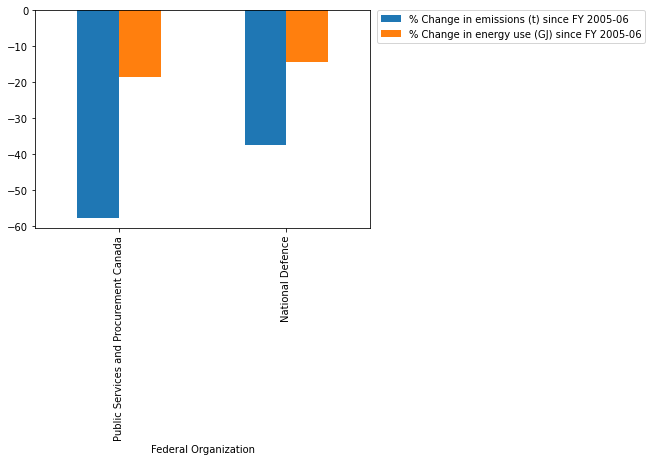

In [22]:
sixfig_percent_plot = org_sixfig_reduct.plot(x = 'Federal Organization', y = ['% Change in emissions (t) since FY 2005-06', '% Change in energy use (GJ) since FY 2005-06'], kind = 'bar')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Plots of gross change in emissions and energy use for federal organizaations that made six figure reductions in emissions

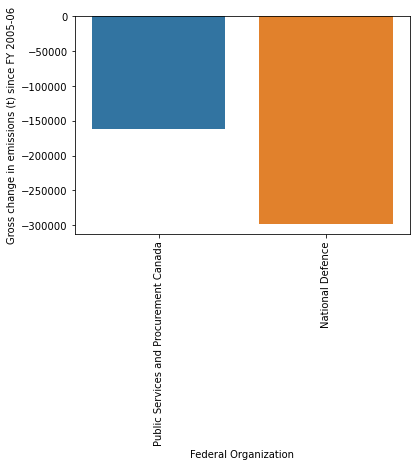

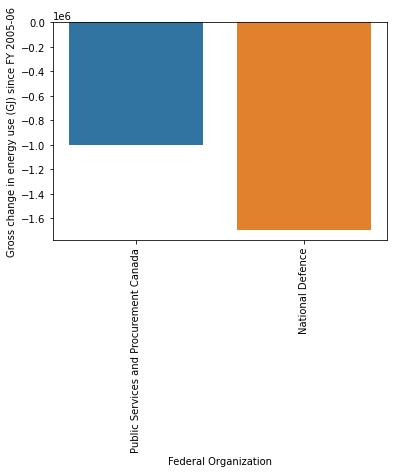

In [23]:
sixfig_emit_plot = sns.barplot(x = 'Federal Organization', y = 'Gross change in emissions (t) since FY 2005-06', data = org_sixfig_reduct)
sixfig_emit_plot.tick_params(axis='x', rotation=90)
plt.show()

sixfig_energy_plot = sns.barplot(x = 'Federal Organization', y = 'Gross change in energy use (GJ) since FY 2005-06', data = org_sixfig_reduct)
sixfig_energy_plot.tick_params(axis='x', rotation=90)
plt.show()

#### Plot of percentage change in energy use and emissions for federal organizations that made five figure reductions in emissions.

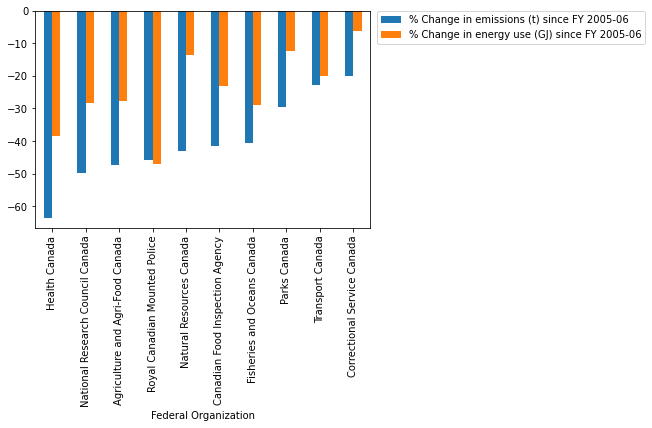

In [24]:
fivefig_percent_plot = org_fivefig_reduct.plot(x = 'Federal Organization', y = ['% Change in emissions (t) since FY 2005-06', '% Change in energy use (GJ) since FY 2005-06'], kind = 'bar')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Plots of gross change in emissions and energy use for federal organizaations that made five figure reductions in emissions

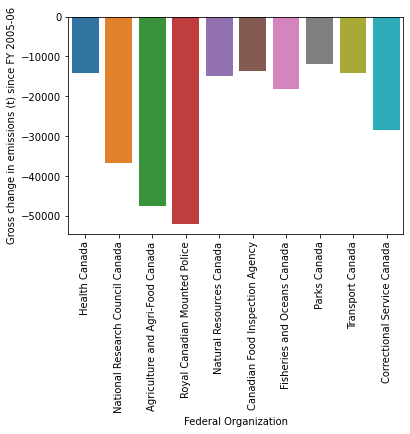

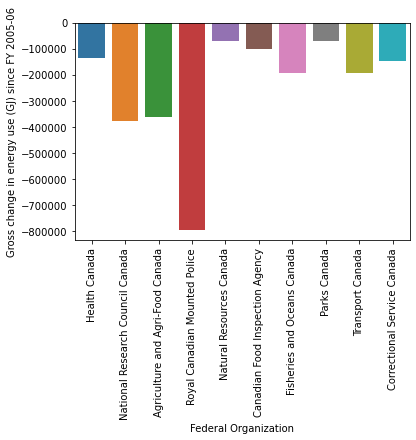

In [25]:
fivefig_emit_plot = sns.barplot(x = 'Federal Organization', y = 'Gross change in emissions (t) since FY 2005-06', data = org_fivefig_reduct)
fivefig_emit_plot.tick_params(axis='x', rotation=90)
plt.show()

fivefig_energy_plot = sns.barplot(x = 'Federal Organization', y = 'Gross change in energy use (GJ) since FY 2005-06', data = org_fivefig_reduct)
fivefig_energy_plot.tick_params(axis='x', rotation=90)
plt.show()

#### Plot of percentage change in energy use and emissions for federal organizations that made three to four figure reductions in emissions.

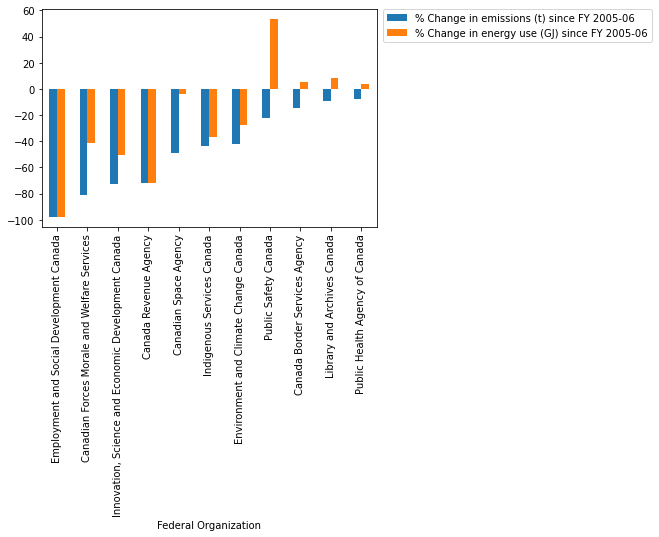

In [26]:
fourthreefig_percent_plot = org_fourthreefig_reduct.plot(x = 'Federal Organization', y = ['% Change in emissions (t) since FY 2005-06', '% Change in energy use (GJ) since FY 2005-06'], kind = 'bar')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Plots of gross change in emissions and energy use for federal organizaations that made three to four figure reductions in emissions

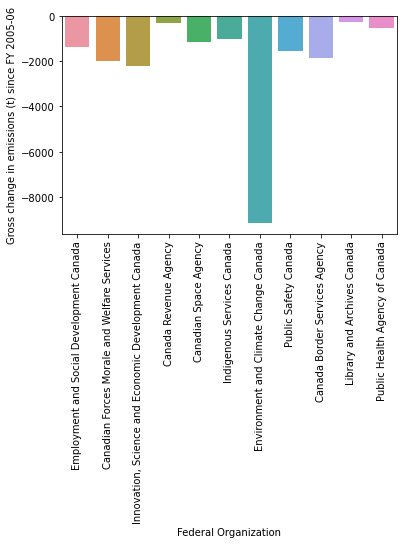

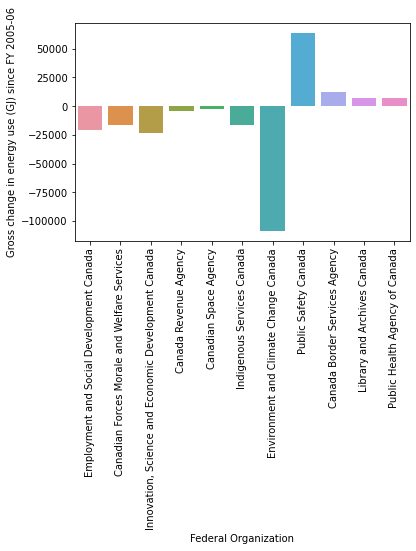

In [27]:
fourthreefig_emit_plot = sns.barplot(x = 'Federal Organization', y = 'Gross change in emissions (t) since FY 2005-06', data = org_fourthreefig_reduct)
fourthreefig_emit_plot.tick_params(axis='x', rotation=90)
plt.show()

fourthreefig_energy_plot = sns.barplot(x = 'Federal Organization', y = 'Gross change in energy use (GJ) since FY 2005-06', data = org_fourthreefig_reduct)
fourthreefig_energy_plot.tick_params(axis='x', rotation=90)

#### Plot of percentage change in energy use and emissions for federal organizations that made two figure reductions in emissions.

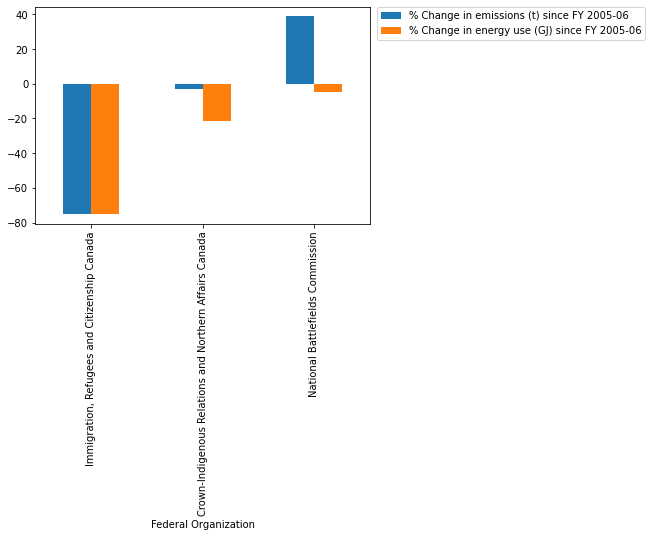

In [28]:
twofig_percent_plot = org_twofig_reduct.plot(x = 'Federal Organization', y = ['% Change in emissions (t) since FY 2005-06', '% Change in energy use (GJ) since FY 2005-06'], kind = 'bar')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Plots of gross change in emissions and energy use for federal organizaations that made two figure reductions in emissions

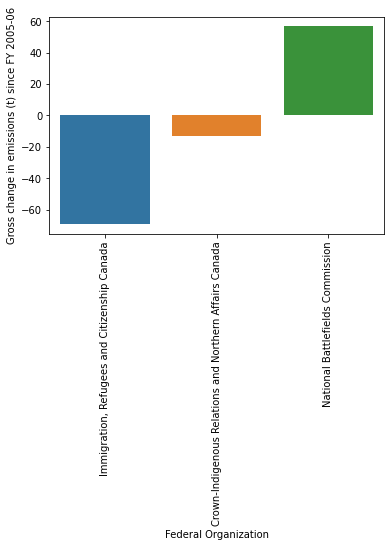

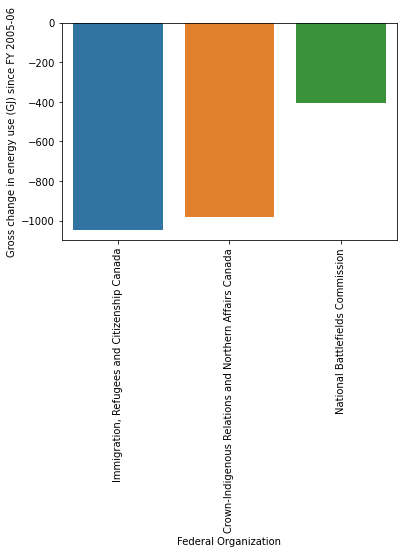

In [29]:
twofig_emit_plot = sns.barplot(x = 'Federal Organization', y = 'Gross change in emissions (t) since FY 2005-06', data = org_twofig_reduct)
twofig_emit_plot.tick_params(axis='x', rotation=90)
plt.show()

twofig_energy_plot = sns.barplot(x = 'Federal Organization', y = 'Gross change in energy use (GJ) since FY 2005-06', data = org_twofig_reduct)
twofig_energy_plot.tick_params(axis='x', rotation=90)

These plots demonstrate that organizations that have made the largest reduction in emissions percentage wise have not necessariy made the largest reduction in gross emissions. 

It is the case for the majority of organizations that made five figure and six figure reductions in emissions that percent change in energy use is less than that of percent change in emissions. This indicates the possibility that reductions were acheived not soley from the decreased use of green house gas emitting energy sources, but aslo from efficency improvements made to those energy sources.

Overall, thse plots serve as useful visual aids to see the progress of federal organizations of different types and scales in reducing their green house gas emissions. Generaly reductions in energy use are correlated with reductions in emissions. An exploration of how the relationship between energy sources and emissions affect the changes in emissions for a federal organization will be conducted in the next step of our analysis.

### A Look at two federal organizations making strides in emissions reduction

Two organizations of note that reduced emissions by more than the federal total of 40.6% are Public Services and Procurement Canada and Employment and Social Development Canada. Public Services and Procurement Canada reduced their emissions by 57.7% from 2005 levels and made the second largest gross reduction. While the gross reduction in emissions of Employment and Social Development Canada amounted to only 1380.8 tons, they acheived the highest percentage reduction in emissions with a 97.6% decrease from 2005 levels. Sub-DataFrames of these organizations can be created from fed_emissions and examined to determine how these reductions were made. Emissions will be broken down by energy category and plotted. Public Services and Procurement Canada will be abbreviated as pspCan and Employment and Social Development and employment Canada as esdCan

### Graphical Analysis of Emissions and Energy Use by Energy Category for Public Services and Procurement Canada

A sub-DataFrame contaning the information for Public Services and Procurement Canada will be created. Two additional DataFrames can be created to summarize the total energy use and emissions by energy category; pspCan_source_totals will list the energy category and the source, federal facilities or fleets, that produced them. pspCan_totals will list the total emissions overall for each category.

In [30]:
# Create a DataFrame containing only the entries for Public Services and Procurement Canada from fed_emissions
pspCan = fed_emissions.loc[fed_emissions['Federal organization'] == 'Public Services and Procurement Canada']

# Create a dataframe that lists the total emissions and energy use per greenhouse gas source and energy category
pspCan_source_totals = pspCan.groupby(['Energy category', 'GHG source'], as_index = False).sum()

# Use the groupby function to form a DataFrame containing only the columns we need for analysis
pspCan = pspCan.groupby(['Energy category', 'FY ending on'], as_index = False).sum().sort_values('FY ending on')

# Create a DataFrame that lists the total emissions and energy use per energy category
pspCan_totals = pspCan.groupby(['Energy category'], as_index = False).sum()

It would be useful to see the breakdown of emissions according to their source, as some categories of energy are utilized exclusively by facilities or exclusively by fleets, while others are used by both. We can create add a column, "% Energy category makeup" that indicates what % of emissions a GHG source contributes for each energy category

In [31]:
source_makeup = []

count = 0

source_name = pspCan_source_totals['Energy category'].values

for catEmit in pspCan_source_totals['Emissions (t)']:
    count += 1
    
    percent_entry = catEmit/pspCan_totals.loc[pspCan_totals['Energy category'] == source_name[count - 1]]['Emissions (t)'].item()
    percent_entry *= 100
    
    source_makeup.append(percent_entry)

In [32]:
pspCan_source_totals['% Energy category makeup'] = source_makeup

In [33]:
pspCan_source_totals

,Energy category,GHG source,Energy use (GJ),Emissions (t),% Energy category makeup
0,district cooling,facilities,1723679.9299,25030.9125,100.0000
1,district energy,facilities,6225703.7529,438526.3726,100.0000
2,district heating,facilities,2882171.0037,242631.6051,100.0000
3,electricity,facilities,35127533.4540,673532.6669,100.0000
4,"fuel oil (1,2,4,5,6, diesel, kerosene)",facilities,818204.7537,58201.4920,95.8874
5,"fuel oil (1,2,4,5,6, diesel, kerosene)",fleet,34967.6815,2496.2587,4.1126
6,fuels with renewable content,fleet,9825.2150,495.2332,100.0000
7,gasoline,fleet,133398.7044,8673.4738,100.0000
8,liquified petroleum gas,facilities,101132.1935,6169.8849,99.9369
9,liquified petroleum gas,fleet,64.0557,3.8984,0.0631


In [34]:
pspCan_source_totals.groupby(['GHG source']).sum()

,Energy use (GJ),Emissions (t),% Energy category makeup
GHG source,,,
facilities,59341105.8588,2064399.0453,695.8243
fleet,178255.6991,11668.8665,204.1757


The majority of Public Services and Procurement Canada's emissions stem from their facilities. 

pspCan_totals provides an overview of the energy categories used by Public Services and Procurement Canada and the culminative emissions they have produced. The rate of KG of emissions emitted per GJ of energy used will be computed for each energy category to provide an idea of how polluting each category is.

In [35]:
# Calculate the ratio of kg of emissions per GJ of energy used for each energy category
pspCan_totals['Emissions per GJ of energy (KG/GJ)'] = (pspCan_totals['Emissions (t)']*1000)/pspCan_totals['Energy use (GJ)']
pspCan_totals.sort_values('Emissions (t)')

,Energy category,Energy use (GJ),Emissions (t),Emissions per GJ of energy (KG/GJ)
5,fuels with renewable content,9825.2150,495.2332,50.4043
7,liquified petroleum gas,101196.2492,6173.7833,61.0080
6,gasoline,133398.7044,8673.4738,65.0192
0,district cooling,1723679.9299,25030.9125,14.5218
4,"fuel oil (1,2,4,5,6, diesel, kerosene)",853172.4352,60697.7506,71.1436
2,district heating,2882171.0037,242631.6051,84.1836
1,district energy,6225703.7529,438526.3726,70.4380
8,natural gas,12462680.8134,620306.1137,49.7731
3,electricity,35127533.4540,673532.6669,19.1739


Public Service and Procurement's Canada largest energy category by energy use is electricty; electricity produces the second least amount of kg/GJ of emissions. 

#### Energy Category Lineplots for Public Services and Procurement Canada

Several lineplots will be constructed to display the energy use and emissions per year for each energy category used by Public Services and Procuremen Canada. These lineplots will be seperated by the magnitude of total emissions produced by each energy category.

In [36]:
# Sort the energy categories into different lists based on magnitude of emissions
pspCan_sixfig_EC = ['district heating', 'district energy', 'natural gas', 'electricity']
pspCan_fivefig_EC = ['district cooling', 'fuel oil (1,2,4,5,6, diesel, kerosene)']
pspCan_lessfig_EC = ['fuels with renewable content', 'liquified petroleum gas', 'gasoline']

In [37]:
# Create sub DataFrames containing only the energy categories in each list
pspCan_sixfig_EC_frame = pspCan.loc[pspCan['Energy category'].isin(pspCan_sixfig_EC)]
pspCan_fivefig_EC_frame = pspCan.loc[pspCan['Energy category'].isin(pspCan_fivefig_EC)]
pspCan_lessfig_EC_frame = pspCan.loc[pspCan['Energy category'].isin(pspCan_lessfig_EC)]

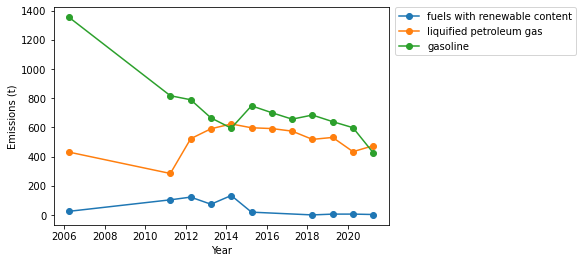

In [38]:
# Plot emissions for the energy sources that produced less than 10,000 tonnes of emissions
for enCat in pspCan_lessfig_EC:
    plot_data_emit = pspCan.loc[pspCan['Energy category'] == enCat]
    plt.plot_date(plot_data_emit['FY ending on'], plot_data_emit['Emissions (t)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

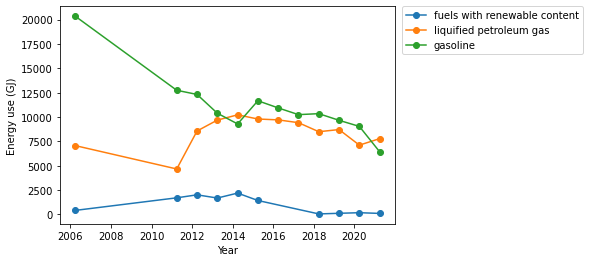

In [39]:
# Plot energy use for the energy sources that produced less than 10,000 tonnes of emissions
for enCat in pspCan_lessfig_EC:
    plot_data_energy = pspCan.loc[pspCan['Energy category'] == enCat]
    plt.plot_date(plot_data_energy['FY ending on'], plot_data_energy['Energy use (GJ)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (GJ)')
plt.show()

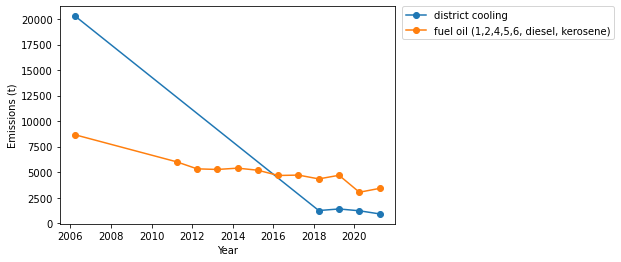

In [40]:
# Plot the emissions for the energy sources that produced five figure tonnes of emissions
for enCat in pspCan_fivefig_EC:
    plot_data = pspCan.loc[pspCan['Energy category'] == enCat]
    plt.plot_date(plot_data['FY ending on'], plot_data['Emissions (t)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

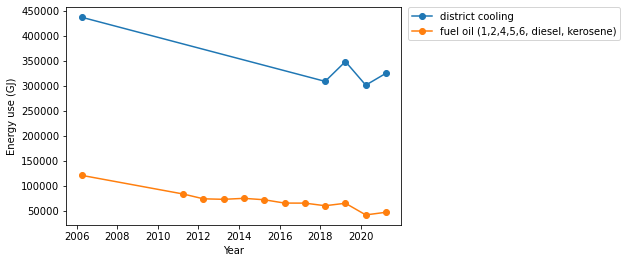

In [41]:
#Plot the energy use for energy sources that produced five figure tonnes of emissions
for enCat in pspCan_fivefig_EC:
    plot_data_energy = pspCan.loc[pspCan['Energy category'] == enCat]
    plt.plot_date(plot_data_energy['FY ending on'], plot_data_energy['Energy use (GJ)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (GJ)')
plt.show()

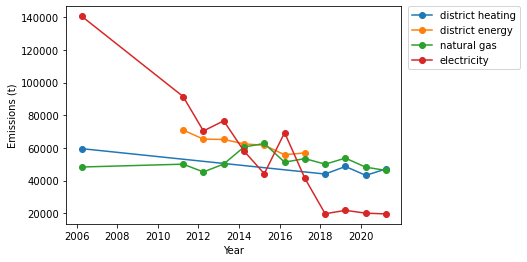

In [42]:
#Plot the emissions for energy sources that produced six figure tonnes of emissions
for enCat in pspCan_sixfig_EC:
    plot_data = pspCan.loc[pspCan['Energy category'] == enCat]
    plt.plot_date(plot_data['FY ending on'], plot_data['Emissions (t)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

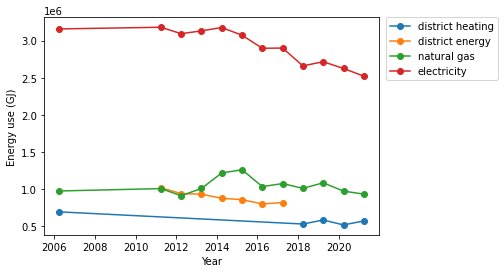

In [43]:
#Plot the energy use for energy sources that produced six figure tonnes of emissions
for enCat in pspCan_sixfig_EC:
    plot_data_energy = pspCan.loc[pspCan['Energy category'] == enCat]
    plt.plot_date(plot_data_energy['FY ending on'], plot_data_energy['Energy use (GJ)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (GJ)')
plt.show()

The line plots of most energy categories are very similar in both energy use and energy category. This indicates an approximate linear relationship between energy use and emissions. The energy categories that serve as exceptions to this are district cooling and electricity. For both of these categories, energy use decline slightly while emissions declined significantly. The data dictionary for the dataset defines electricity as being comprised of grid-based electricty and renewable energy purchases. A clear definition is not given for district cooling in the data dictionary; according to a __[news release](https://www.canada.ca/en/public-services-procurement/news/2017/07/government_of_canadacommittedtomodernizingheatingandcoolingplant.html)__ by the federal government, district energy refers to central plants that provide heating by steam and cooling by chilled water. The same news release makes note of efforts to modernize the network of plants that provide heating and cooling in order to reduce emissions (Public Services and Procurement, 2017).

### Graphical Analysis of Emissions and Energy Use by Energy Category for Employment and Social Development Canada

A sub-DataFrame contaning the information for Employment and Social Developmet Canada will be created. As was done for Public Services and Procurement Canada, two totals DataFrames will be constructed, with esdCan_source_totals summarizing the total emissions by energy category and GHG source and esdCan_totals summarizing total emissions overall by energy category.

In [44]:
# Create a DataFrame containing only the entries for Employment and Social Development Canada from fed_emissions
esdCan = fed_emissions.loc[fed_emissions['Federal organization'] == 'Employment and Social Development Canada']

# Create a DataFrame that lists the total emissions and energy use per greenhouse gas source and energy category
esdCan_source_totals = esdCan.groupby(['Energy category', 'GHG source'], as_index = False).sum()

# Use the groupby function to form a DataFrame containing only the columns we need for analysis
esdCan = esdCan.groupby(['Energy category', 'FY ending on'], as_index = False).sum().sort_values('FY ending on')

# Create a DataFrame that lists the total emissions and energy use per energy category
esdCan_totals = esdCan.groupby(['Energy category'], as_index = False).sum()

Create a column for esdCan_source_totals that displays the % of emissions a GHG source contributes for each energy category

In [45]:
source_makeup = []

count = 0

source_name = esdCan_source_totals['Energy category'].values

for catEmit in esdCan_source_totals['Emissions (t)']:
    count += 1
    
    percent_entry = catEmit/esdCan_totals.loc[esdCan_totals['Energy category'] == source_name[count - 1]]['Emissions (t)'].item()
    percent_entry *= 100
    
    source_makeup.append(percent_entry)

In [46]:
esdCan_source_totals['% Energy category makeup'] = source_makeup

In [47]:
esdCan_source_totals

,Energy category,GHG source,Energy use (GJ),Emissions (t),% Energy category makeup
0,"fuel oil (1,2,4,5,6, diesel, kerosene)",fleet,806.5636,57.5396,100.0000
1,fuels with renewable content,fleet,4146.3828,254.2633,100.0000
2,gasoline,fleet,94510.8005,6131.8576,100.0000
3,liquified petroleum gas,fleet,8.2840,0.5042,100.0000
4,natural gas,fleet,0.0297,0.0017,100.0000


100% percent of Employment and Social Development Canada's emissions are produced by its fleets. The data dictonary defines fleets as consisting of on-road vehicles, marine vessels, aircraft and mobile equipment. 

The DataFrame pspCan_totals provides an overview of the energy sources used by Employment and Social Development Canada and the culminative emissions they have produced. The rate of kg of emissions emitted per GJ of energy used will be computed for each energy category to provide an idea of how polluting each category is.

In [48]:
esdCan_totals['Emissions per GJ of energy (KG/GJ)'] = (esdCan_totals['Emissions (t)']*1000)/esdCan_totals['Energy use (GJ)']
esdCan_totals.sort_values('Emissions (t)')

,Energy category,Energy use (GJ),Emissions (t),Emissions per GJ of energy (KG/GJ)
4,natural gas,0.0297,0.0017,57.0500
3,liquified petroleum gas,8.2840,0.5042,60.8590
0,"fuel oil (1,2,4,5,6, diesel, kerosene)",806.5636,57.5396,71.3391
1,fuels with renewable content,4146.3828,254.2633,61.3217
2,gasoline,94510.8005,6131.8576,64.8800


#### Energy Category Lineplots for Employment and Social Development Canada

As done above, several lineplots will be constructed to display the emissions and energy use per year for each energy category used by Employment and Social Development Canada. These lineplots will be seperated by the magnitude of total emissions produced by each energy category.

In [49]:
# Sort the energy categories into different lists based on magnitude of emissions
esdCan_lessfig_EC = ['natural gas', 'liquified petroleum gas']
esdCan_twothreefig_EC = ['fuel oil (1,2,4,5,6, diesel, kerosene)', 'fuels with renewable content']

In [50]:
# Create sub DataFrames containing only the energy categories in each list
esdCan_lessfig_EC_frame = esdCan.loc[esdCan['Energy category'].isin(esdCan_lessfig_EC)]
esdCan_twothreefig_EC_frame = esdCan.loc[esdCan['Energy category'].isin(esdCan_twothreefig_EC)]
esdCan_gasoline = esdCan.loc[esdCan['Energy category'] == 'gasoline']

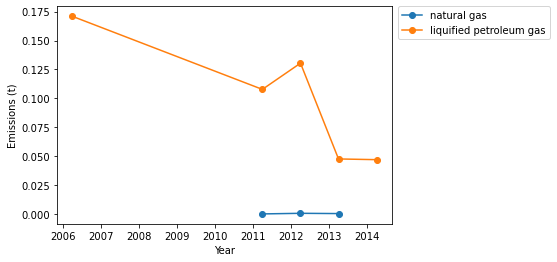

In [51]:
# Plot the emissions for the energy sources that produced less than 1 tonne of emissions
for enCat in esdCan_lessfig_EC:
    plot_data_emit = esdCan.loc[esdCan['Energy category'] == enCat]
    plt.plot_date(plot_data_emit['FY ending on'], plot_data_emit['Emissions (t)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

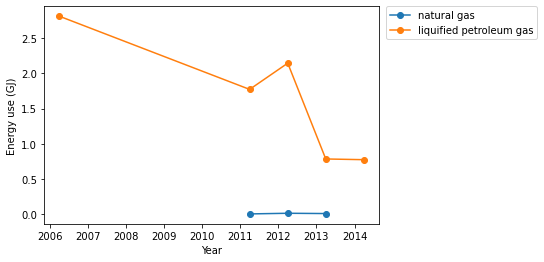

In [52]:
# Plot the energy use for the energy sources that produced less than 1 tonne of emissions
for enCat in esdCan_lessfig_EC:
    plot_data_energy = esdCan.loc[esdCan['Energy category'] == enCat]
    plt.plot_date(plot_data_energy['FY ending on'], plot_data_energy['Energy use (GJ)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (GJ)')
plt.show()

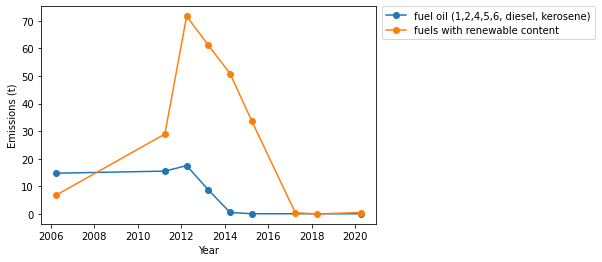

In [53]:
# Plot the emissions for the energy sources that produced 10 to 99 toness of emissions
for enCat in esdCan_twothreefig_EC:
    plot_data = esdCan.loc[esdCan['Energy category'] == enCat]
    plt.plot_date(plot_data['FY ending on'], plot_data['Emissions (t)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

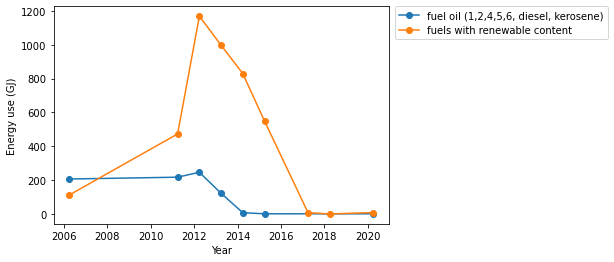

In [54]:
# Plot the energy use for the energy sources that produced 10 to 999 tonnes of emissions
for enCat in esdCan_twothreefig_EC:
    plot_data_energy = esdCan.loc[esdCan['Energy category'] == enCat]
    plt.plot_date(plot_data_energy['FY ending on'], plot_data_energy['Energy use (GJ)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (GJ)')
plt.show()

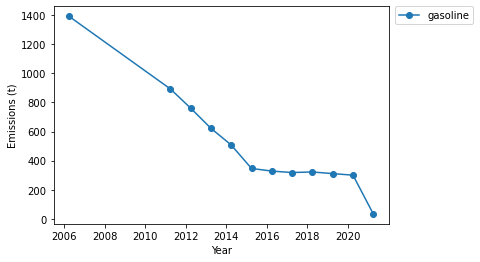

In [55]:
# Plot the emissions for gasoline, which produced over 1000 tonnes of emissions
plot_data = esdCan.loc[esdCan['Energy category'] == 'gasoline']
plt.plot_date(plot_data['FY ending on'], plot_data['Emissions (t)'], linestyle = 'solid', label = 'gasoline')

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

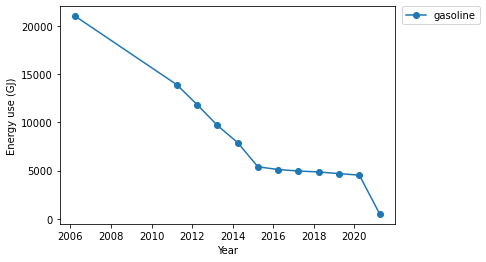

In [56]:
# Plot the energy use for gasoline, which produced over 1000 tonnes of emissions
plot_data = esdCan.loc[esdCan['Energy category'] == 'gasoline']
plt.plot_date(plot_data['FY ending on'], plot_data['Energy use (GJ)'], linestyle = 'solid', label = 'gasoline')

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (GJ)')
plt.show()

In [57]:
esdCan.loc[esdCan['Energy category'] == 'gasoline']

,Energy category,FY ending on,Energy use (GJ),Emissions (t)
16,gasoline,2006-03-31,21035.2826,1392.3847
17,gasoline,2011-03-31,13930.1400,892.7230
18,gasoline,2012-03-31,11864.1425,760.3220
19,gasoline,2013-03-31,9702.8750,621.8157
20,gasoline,2014-03-31,7912.5830,507.0835
21,gasoline,2015-03-31,5399.9645,346.0606
22,gasoline,2016-03-31,5114.3445,327.7564
23,gasoline,2017-03-31,4962.1705,318.0042
24,gasoline,2018-03-31,4861.6484,321.8066
25,gasoline,2019-03-31,4692.7657,310.6275


All of Employment and Social Development Canada's emissions came from vehicles. The massive reductions they acheived in emissions simply resulted from substantial reductions in use of GHG emitting fuels, the bulk of which was gasoline. Whether
gas-powered vehicles were replaced by eletric ones or a transition was made to alternative forms of transportation is outside the scope of the dataset. Regardless Employment and Social Development's progress in emissions reduction is an example of how great progress can be made simply by reducing use of fossil fuels.

### A Look at two federal organizations who have some cacthing up to in terms of emissions reduction

Two organizations that were not as succesful in reducing their emissions are Tansport Canada and The Public Health Agency of Canada, with their reductions from 2005 levels at 22.8% and 7.4% respectively. A similiar graphical apporach will be taken as the previous section, breaking down the emissions for each organization by energy category. Transport Canada will be abbreivated as transCan and Public Health Agency of Canada will be abbreviated as phaCan.

### Graphical Analysis of Emissions and Energy Use by Energy Category for Transport Canada

As done for the previous two data organizations, a sub-DataFrame contaning the information for Transport Canada will be created. Two totals DataFrames will be aslo be constructed, with transCan_source_totals summarizing the total emissions by energy category and GHG source and transCan_totals summarizing total emissions overall by energy category.

In [58]:
# Create a DataFrame containing only the entries for Transport Canada from fed_emissions
transCan = fed_emissions.loc[fed_emissions['Federal organization'] == 'Transport Canada']

# Create a DataFrame that lists the total emissions and energy use per greenhouse gas source and energy category
transCan_source_totals = transCan.groupby(['Energy category', 'GHG source'], as_index = False).sum()

# Use the groupby function to form a DataFrame containing only the columns we need for analysis
transCan = transCan.groupby(['Energy category', 'FY ending on'], as_index = False).sum().sort_values('FY ending on')

# Create a DataFrame that lists the total emissions and energy use per category
transCan_totals = transCan.groupby(['Energy category'], as_index = False).sum()

Create a column for transCan_source_totals that displays the % of emissions a GHG source contributes for each energy category.

In [59]:
source_makeup = []

count = 0

source_name = transCan_source_totals['Energy category'].values

for catEmit in transCan_source_totals['Emissions (t)']:
    count += 1
    
    percent_entry = catEmit/transCan_totals.loc[transCan_totals['Energy category'] == source_name[count - 1]]['Emissions (t)'].item()
    percent_entry *= 100
    
    source_makeup.append(percent_entry)

In [60]:
transCan_source_totals['% Energy category makeup'] = source_makeup

In [61]:
transCan_source_totals

,Energy category,GHG source,Energy use (GJ),Emissions (t),% Energy category makeup
0,aviation fuel,fleet,1422272.7557,98805.7864,100.0000
1,electricity,facilities,860764.7332,9922.6610,100.0000
2,"fuel oil (1,2,4,5,6, diesel, kerosene)",facilities,295509.9906,21143.4915,4.3814
3,"fuel oil (1,2,4,5,6, diesel, kerosene)",fleet,6524992.4237,461431.6453,95.6186
4,fuels with renewable content,fleet,26357.4544,1498.1853,100.0000
5,gasoline,fleet,326363.4733,21390.3320,100.0000
6,liquified petroleum gas,facilities,39030.9183,2381.2463,76.9932
7,liquified petroleum gas,fleet,11691.8784,711.5554,23.0068
8,natural gas,facilities,130669.4492,6508.7752,100.0000
9,natural gas,fleet,0.0401,0.0023,0.0000


In [62]:
transCan_source_totals.groupby(['GHG source']).sum()

,Energy use (GJ),Emissions (t),% Energy category makeup
GHG source,,,
facilities,1325975.0913,39956.1740,281.3745
fleet,8311678.0256,583837.5067,418.6255


As what might be expected based off the organization's name, most of Transport Canada's are produced by their fleets of vehicles.

The DataFrame transCan_totals provides an overview of the energy sources used by Transport Canada and the culminative emissions they have produced. The rate of kg of emissions emitted per GJ of energy used will be computed for each energy category to provide an idea of how polluting each category is.

In [63]:
transCan_totals['Emissions per GJ of energy (KG/GJ)'] = (transCan_totals['Emissions (t)']*1000)/transCan_totals['Energy use (GJ)']
transCan_totals.sort_values('Emissions (t)')

,Energy category,Energy use (GJ),Emissions (t),Emissions per GJ of energy (KG/GJ)
3,fuels with renewable content,26357.4544,1498.1853,56.8410
5,liquified petroleum gas,50722.7967,3092.8017,60.9746
6,natural gas,130669.4893,6508.7774,49.8110
1,electricity,860764.7332,9922.6610,11.5277
4,gasoline,326363.4733,21390.3320,65.5414
0,aviation fuel,1422272.7557,98805.7864,69.4704
2,"fuel oil (1,2,4,5,6, diesel, kerosene)",6820502.4143,482575.1368,70.7536


#### Energy Category Lineplots for Transport Canada

Several lineplots can be constructed to display the energy use and emissions per year for each energy category used by Transport Canada. These lineplots will be seperated by magnitude of total emissions.

In [64]:
# Sort the energy categories into different lists based on magnitude of emissions
transCan_fourfig_EC = ['fuels with renewable content', 'liquified petroleum gas', 'natural gas', 'electricity']
transCan_fivefig_EC = ['gasoline', 'aviation fuel']

In [65]:
# Create sub DataFrames containing only the energy categories in each list
transCan_fourfig_EC_frame = transCan.loc[transCan['Energy category'].isin(transCan_fourfig_EC)]
transCan_fivefig_EC_frame = transCan.loc[transCan['Energy category'].isin(transCan_fivefig_EC)]
transCan_fueloil = transCan.loc[transCan['Energy category'] == 'fuel oil (1,2,4,5,6, diesel, kerosene)']

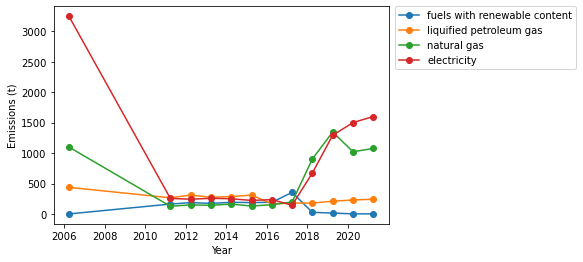

In [66]:
# Plot the emissions for the energy sources that produced four figure tonnes of emissionsb
for enCat in transCan_fourfig_EC:
    plot_data = transCan.loc[transCan['Energy category'] == enCat]
    plt.plot_date(plot_data['FY ending on'], plot_data['Emissions (t)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

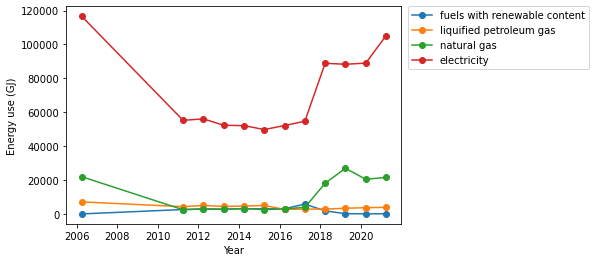

In [67]:
# Plot the energy use for the energy sources that produced four figure tonnes of emissions
for enCat in transCan_fourfig_EC:
    plot_data = transCan.loc[transCan['Energy category'] == enCat]
    plt.plot_date(plot_data['FY ending on'], plot_data['Energy use (GJ)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (GJ)')
plt.show()

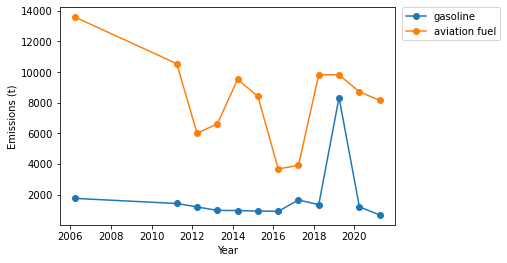

In [68]:
# Plot the emissions for energy sources that produced five figure tonnes of emissions
for enCat in transCan_fivefig_EC:
    plot_data = transCan.loc[transCan['Energy category'] == enCat]
    plt.plot_date(plot_data['FY ending on'], plot_data['Emissions (t)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

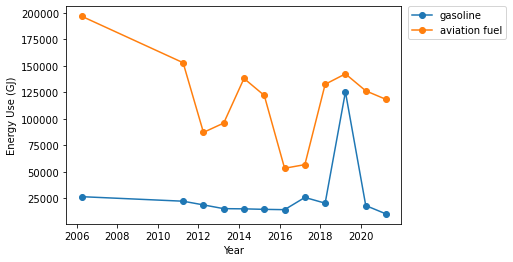

In [69]:
# Plot the energy use for the energy sources that produced four figure tonnes of emissions
for enCat in transCan_fivefig_EC:
    plot_data = transCan.loc[transCan['Energy category'] == enCat]
    plt.plot_date(plot_data['FY ending on'], plot_data['Energy use (GJ)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy Use (GJ)')
plt.show()

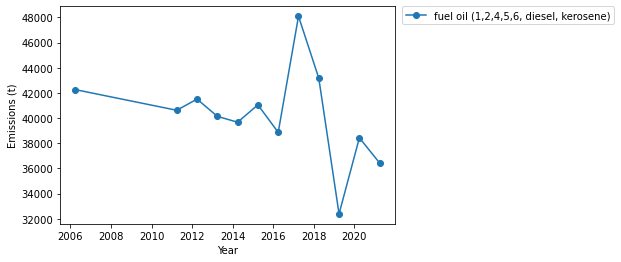

In [70]:
# Plot the emissions for fuel oil, which produced over 100,000 tones of emissionsb
plot_data = transCan.loc[transCan['Energy category'] == 'fuel oil (1,2,4,5,6, diesel, kerosene)']
plt.plot_date(plot_data['FY ending on'], plot_data['Emissions (t)'], linestyle = 'solid', label = 'fuel oil (1,2,4,5,6, diesel, kerosene)')

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

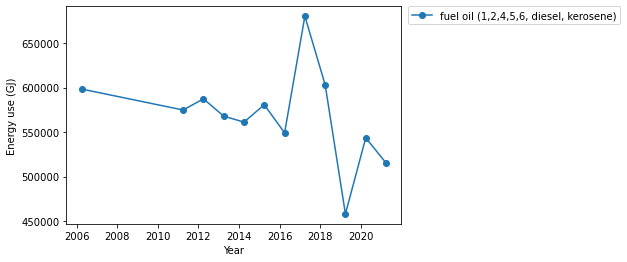

In [71]:
# Plot the energy use for fuel oil, which produced over 100,000 tones of emissions
plot_data = transCan.loc[transCan['Energy category'] == 'fuel oil (1,2,4,5,6, diesel, kerosene)']
plt.plot_date(plot_data['FY ending on'], plot_data['Energy use (GJ)'], linestyle = 'solid', label = 'fuel oil (1,2,4,5,6, diesel, kerosene)')

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (GJ)')
plt.show()

In [72]:
transCan.loc[transCan['Energy category'] == 'fuel oil (1,2,4,5,6, diesel, kerosene)']

,Energy category,FY ending on,Energy use (GJ),Emissions (t)
24,"fuel oil (1,2,4,5,6, diesel, kerosene)",2006-03-31,598410.2230,42258.4120
25,"fuel oil (1,2,4,5,6, diesel, kerosene)",2011-03-31,574867.9008,40616.3094
26,"fuel oil (1,2,4,5,6, diesel, kerosene)",2012-03-31,587427.8743,41503.2696
27,"fuel oil (1,2,4,5,6, diesel, kerosene)",2013-03-31,567990.1724,40134.3696
28,"fuel oil (1,2,4,5,6, diesel, kerosene)",2014-03-31,561272.9669,39666.1402
29,"fuel oil (1,2,4,5,6, diesel, kerosene)",2015-03-31,580785.0257,41047.0360
30,"fuel oil (1,2,4,5,6, diesel, kerosene)",2016-03-31,549187.7737,38859.6146
31,"fuel oil (1,2,4,5,6, diesel, kerosene)",2017-03-31,680284.9277,48090.3340
32,"fuel oil (1,2,4,5,6, diesel, kerosene)",2018-03-31,603283.5368,43171.6774
33,"fuel oil (1,2,4,5,6, diesel, kerosene)",2019-03-31,458043.8244,32377.8165


Similary to Employment and Social Development Canada, the majority of Transport Canada's emissions comes from its vehicle fleets. Whereas Employment and Social Development Canada made consistent and substantial reductions to its use of fuels such as gasoline, Transport Canada was unable to cut back as much on its use of GHG producing fuels. This will be discussed further in the discussion section.

### Graphical Analysis of Emissions and Energy Use by Energy Category for the Public Health Agency of Canada

Lastly for The Public Health Agency of Canada the same approach will be taken as the previous organizations, with several sub-DataFrame contaning and summarizing the emissions data of the agency being created.. Two totals DataFrames will be aslo be constructed, with phaCan_source_totals summarizing the total emissions by energy category and GHG source and phaCan_totals summarizing total emissions overall by energy category.

In [73]:
# Creata a DataFrame containing only the entries for The Public Health Agency of Canada from fed_emissions
phaCan = fed_emissions.loc[fed_emissions['Federal organization'] == 'Public Health Agency of Canada']

# Create a DataFrame that lists the total emissions and energy use per greenhouse gas source and energy category
phaCan_source_totals = phaCan.groupby(['Energy category', 'GHG source'], as_index = False).sum()

# Use the groupby function to form a DataFrame containing only the columns we need for analysis
phaCan = phaCan.groupby(['Energy category', 'FY ending on'], as_index = False).sum().sort_values('FY ending on')

# Create a DataFrame that lists total emissions and energy use per energy category
phaCan_totals = phaCan.groupby(['Energy category'], as_index = False).sum()

Create a column for transCan_source_totals that displays the % of emissions a GHG source contributes for each energy category.

In [74]:
source_makeup = []

count = 0

source_name = phaCan_source_totals['Energy category'].values

for catEmit in phaCan_source_totals['Emissions (t)']:
    count += 1
    
    percent_entry = catEmit/phaCan_totals.loc[phaCan_totals['Energy category'] == source_name[count - 1]]['Emissions (t)'].item()
    percent_entry *= 100
    
    source_makeup.append(percent_entry)

In [75]:
phaCan_source_totals['% Energy category makeup'] = source_makeup

In [76]:
phaCan_source_totals

,Energy category,GHG source,Energy use (GJ),Emissions (t),% Energy category makeup
0,electricity,facilities,369017.3644,551.7190,100.0000
1,"fuel oil (1,2,4,5,6, diesel, kerosene)",facilities,6322.3046,445.0063,100.0000
2,natural gas,facilities,728728.2960,36119.2302,100.0000


100% of The Public Health Agency of Canada's emissions come from their facilities.

The DataFrame phaCan_totals provides an overview of the energy sources used by The Public Health Agency of Canada and the culminative emissions they have produced. The rate of kg of emissions emitted per GJ of energy used will be computed for each energy category to provide an idea of how polluting each category is.

In [77]:
phaCan_totals['Emissions per GJ of energy (KG/GJ)'] = (phaCan_totals['Emissions (t)']*1000)/phaCan_totals['Energy use (GJ)']
phaCan_totals.sort_values('Emissions (t)')

,Energy category,Energy use (GJ),Emissions (t),Emissions per GJ of energy (KG/GJ)
1,"fuel oil (1,2,4,5,6, diesel, kerosene)",6322.3046,445.0063,70.3867
0,electricity,369017.3644,551.7190,1.4951
2,natural gas,728728.2960,36119.2302,49.5647


#### Energy Category Lineplots for The Public Health Agency of Canada

Several lineplots can be constructed to display the energy use and emissions per year for each energy category used by The Public Health Agency of Canada. These lineplots will be seperated by the magnitude of total emissions produced by each energy category.

In [78]:
# Sort the energy categories into different lists based on magnitude of emissions
phaCan_threefig_EC = ['fuel oil (1,2,4,5,6, diesel, kerosene)', 'electricity']

In [79]:
# Create sub DataFrames containing only the energy categories in each list
phaCan_threefig_EC_frame = phaCan.loc[phaCan['Energy category'].isin(phaCan_threefig_EC)]
phaCan_naturalgas = phaCan.loc[phaCan['Energy category'] == 'natural gas']

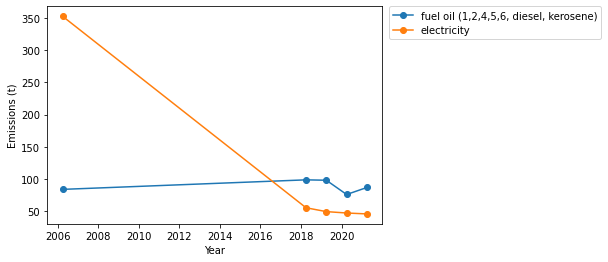

In [80]:
# Plot the emissions for energy sources that produced three figure tonnes of emissions
for enCat in phaCan_threefig_EC:
    plot_data = phaCan.loc[phaCan['Energy category'] == enCat]
    plt.plot_date(plot_data['FY ending on'], plot_data['Emissions (t)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

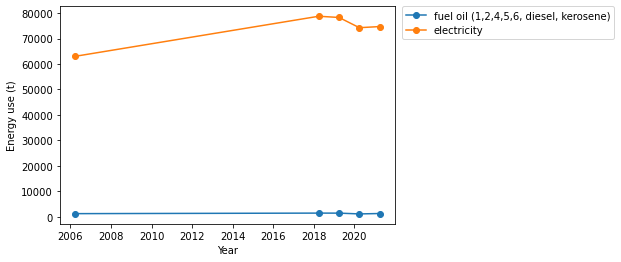

In [81]:
# Plot the energy use for energy sources that produced three figure tonnes of emissions
for enCat in phaCan_threefig_EC:
    plot_data = phaCan.loc[phaCan['Energy category'] == enCat]
    plt.plot_date(plot_data['FY ending on'], plot_data['Energy use (GJ)'], linestyle = 'solid', label = enCat)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (t)')
plt.show()

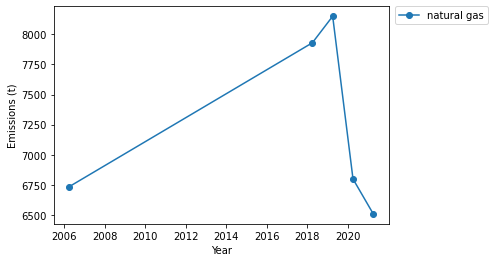

In [82]:
# plot the emissions for natural gas, which produced over 10,000 tonnes of emissions
plot_data = phaCan.loc[phaCan['Energy category'] == 'natural gas']

plt.plot_date(plot_data['FY ending on'], plot_data['Emissions (t)'], linestyle = 'solid', label = 'natural gas')
plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

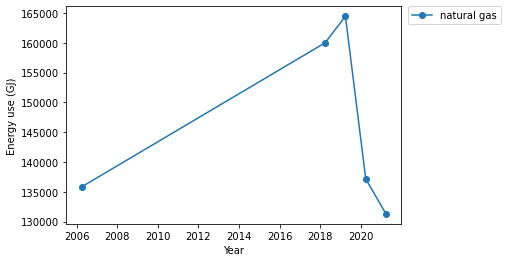

In [83]:
# plot the emissions for natural gas, which produced over 10,000 tonnes of emissions
plot_data = phaCan.loc[phaCan['Energy category'] == 'natural gas']

plt.plot_date(plot_data['FY ending on'], plot_data['Energy use (GJ)'], linestyle = 'solid', label = 'natural gas')
plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('Energy use (GJ)')
plt.show()

In [84]:
phaCan.loc[phaCan['Energy category'] == 'natural gas']

,Energy category,FY ending on,Energy use (GJ),Emissions (t)
10,natural gas,2006-03-31,135829.3312,6732.3980
11,natural gas,2018-03-31,160005.9590,7930.6448
12,natural gas,2019-03-31,164457.2854,8151.2646
13,natural gas,2020-03-31,137148.5693,6797.7175
14,natural gas,2021-03-31,131287.1511,6507.2053


While the Public Health Agency of Canada was able to keep emissions from fuel oil at a relatively constant level and saw a decrease in emissions from eletricity, it was not able to substantially reduce energy use of and emissions from its largest energy category, natural gas.

These plots are useful visual aids to display the relationships between energy usage and culminative emissions from each energy source. The implications of these graphics will be disscussed further in the disccussion section. Now we turn to the second question, that is the  how the percentwise drop in emissions from the 2019-2020 fiscal year to the 2020-2021 fiscal year compares to the average percent wise drop in emissions leading up to the end of the 2019-20 fiscal year. 

## Effects of the pandemic on emissions reduction

Let's start with the emissions summary DataFrame constructed earlier. We can add a column that shows the percent change in emissions year to year.

In [85]:
fed_emit_summary['% Change in emissions'] = fed_emit_summary['Emissions (t)'].pct_change()
fed_emit_summary

,FY ending on,Energy use (GJ),Emissions (t),% Change in emissions
0,2006-03-31,28789615.8893,1801078.3590,NaN
1,2011-03-31,21964007.2240,1275816.5903,-0.2916
2,2012-03-31,20901862.8231,1158247.2277,-0.0922
3,2013-03-31,20764490.3608,1155980.0064,-0.0020
4,2014-03-31,21533394.7589,1161309.7620,0.0046
5,2015-03-31,21249671.0690,1106041.9138,-0.0476
6,2016-03-31,19705544.9573,1037854.0334,-0.0617
7,2017-03-31,20188879.1997,1033519.5696,-0.0042
8,2018-03-31,23853165.5751,1085945.8332,0.0507
9,2019-03-31,26303559.5917,1220279.9176,0.1237


By the chart we can see that after total emissions increased by 5.1% during the fiscal year 2017-2018 and 12.4% during the fiscal year 2018-19, they plunged 28.6% during the 2019-20 fiscal year. Noting that the affects of the Covid-19 Pandemic heightened after the end of the fiscal year 2019-20, emissions increased 22.4% during the fiscal year 2020-2021 but remained 12.3% below pre-pandemic levels.

We can plot the total emissions to visualize these changes.

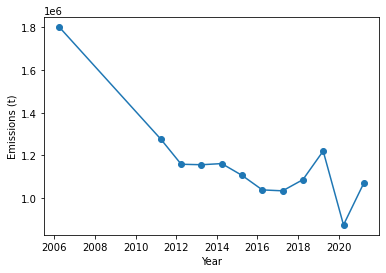

In [86]:
plt.plot_date(fed_emit_summary['FY ending on'], fed_emit_summary['Emissions (t)'], linestyle = 'solid')

plt.xlabel('Year')
plt.ylabel('Emissions (t)')
plt.show()

Covid-19 was declared a pandemic on March 11, 2020. As the Government of Canada's fiscal year ends on March 31st, we will examine the average percent decrease in emissions from fiscal year to fiscal year leading up the fiscal year 2019-2020, which will then be compared to the percent decrease from fiscal year 2019-2020 to 2020-2021. As most organizations have a large gap in data points after the fiscal year 2005-2006, we will find the average for the first year fiscal year after 2005-2006 leading up to 2018-2019. 

In [87]:
org_percent_list = []

average_gross_change_list = []
FY_2020_to_2021_gross_change_list = []

average_percent_change_list = []
FY_2020_to_2021_percent_change_list = []

for org_sum in org_sumList:
    
    # For each organization in org_sumList, create a column of the first differences of emissions
    org_sum['Gross change in emissions (t)'] = org_sum['Emissions (t)'].diff()
    
    # For each organization in org_sumList, create a column of the percent change in emissions
    org_sum['% Change in emissions'] = org_sum['Emissions (t)'].pct_change()
       
    sum_percent = 0
    sum_gross = 0
    counter = 0
    
    if pd.to_datetime('2020-03-31') in org_sum['FY ending on'].values:
        
        # Add the names of organizations that have data leading up to the fiscal year  2019-2020
        org_percent_list.append(org_sum.loc[org_sum['FY ending on'] == pd.to_datetime('2020-03-31')]['Federal organization'].item())
        
        for date in org_sum['FY ending on'].values:
            
            # For the fiscal years after 2005-06, sum the percent change and gross change of an organization's emissions
            if (date > pd.to_datetime('2006-03-31')) & (date < pd.to_datetime('2021-03-21')):
                sum_percent += org_sum.loc[org_sum['FY ending on'] == date]['% Change in emissions'].item()
                
                sum_gross += org_sum.loc[org_sum['FY ending on'] == date]['Gross change in emissions (t)'].item()
                counter += 1
        
        # Calculate the average percent and gross change in emissions
        mean_percent_change = (sum_percent)/(counter)
        mean_gross_change = (sum_gross)/(counter)
        
        # Calculate the percent change in emissions from the fiscal year 2019-2020 to fiscal year 2020-2021
        FY_2020_to_2021_percent_change = (org_sum.loc[org_sum['FY ending on'] == '2021-03-31']['Emissions (t)'].item()
                                       - org_sum.loc[org_sum['FY ending on'] == '2020-03-31']['Emissions (t)'].item())/(org_sum.loc[org_sum['FY ending on'] == '2020-03-31']['Emissions (t)'].item())
        
        # Calculate the gross change in emissions from the fiscal year 2019-2020 to fiscal year 2020-2021
        FY_2020_to_2021_gross_change = (org_sum.loc[org_sum['FY ending on'] == '2021-03-31']['Emissions (t)'].item()
                                       - org_sum.loc[org_sum['FY ending on'] == '2020-03-31']['Emissions (t)'].item())
        
        average_percent_change_list.append(mean_percent_change)
        FY_2020_to_2021_percent_change_list.append(FY_2020_to_2021_percent_change)
        
        average_gross_change_list.append(mean_gross_change)
        FY_2020_to_2021_gross_change_list.append(FY_2020_to_2021_gross_change)


# Construct a DataFrame based on the calculated information
percent_change_data = {'Federal organization': org_percent_list, 'Average gross change in emissions (t) leading to FY 2019-2020': average_gross_change_list, 
                       'Average % Change in emissions leading to FY 2019-2020': average_percent_change_list,
                       'Gross change in emissions from FY 2019-2020 to FY 2020-2021': FY_2020_to_2021_gross_change_list,
                      '% Change in emissions from FY 2019-2020 to FY 2020-2021': FY_2020_to_2021_percent_change_list}  

percent_change_frame = pd.DataFrame(percent_change_data)

We can add to our newly constructed a DataFrame the boolean column "Pandemic Drop Off", which indicates whether that organization saw a greater than average decrease in emissions during the 2020-2021 fiscal year

In [88]:
percent_change_frame['Pandemic Drop Off'] = percent_change_frame['% Change in emissions from FY 2019-2020 to FY 2020-2021'] < percent_change_frame['Average % Change in emissions leading to FY 2019-2020']
percent_change_frame

,Federal organization,Average gross change in emissions (t) leading to FY 2019-2020,Average % Change in emissions leading to FY 2019-2020,Gross change in emissions from FY 2019-2020 to FY 2020-2021,% Change in emissions from FY 2019-2020 to FY 2020-2021,Pandemic Drop Off
0,Agriculture and Agri-Food Canada,-3931.8799,-0.0481,-8080.4127,-0.1332,True
1,Canada Border Services Agency,-134.9156,-0.0088,-510.4160,-0.0446,True
2,Canada Revenue Agency,-18.9129,-0.0609,-97.2239,-0.4668,True
3,Canadian Food Inspection Agency,-5828.7885,-0.1808,-2087.9418,-0.0974,False
4,Canadian Forces Morale and Welfare Services,-1765.9663,-0.7251,-205.9174,-0.3076,False
5,Canadian Space Agency,-348.0331,-0.1538,-82.6059,-0.0667,False
6,Correctional Service Canada,-8447.7637,-0.0601,-2984.1104,-0.0257,False
7,Crown-Indigenous Relations and Northern Affair...,622.0117,1.0100,-1878.8255,-0.8179,True
8,Employment and Social Development Canada,-111.3743,-0.1351,-267.0359,-0.8886,True
9,Environment and Climate Change Canada,-791.3049,-0.0432,-1253.2676,-0.0898,True


The RCMP value for 'Average % Change in emissions leading to FY 2019-2020" is 2600%, which is an outlier and should be set to NaN

In [89]:
percent_change_frame.iat[24, 2] = np.nan

In [90]:
percent_change_frame.groupby(['Pandemic Drop Off']).count()

,Federal organization,Average gross change in emissions (t) leading to FY 2019-2020,Average % Change in emissions leading to FY 2019-2020,Gross change in emissions from FY 2019-2020 to FY 2020-2021,% Change in emissions from FY 2019-2020 to FY 2020-2021
Pandemic Drop Off,,,,,
False,11,11,11,11,11
True,15,15,14,15,15


15 organizations saw greater than average decreases in emissions during the 2020-2021 fiscal year compared to 11 organizations who saw either less than average decrease or saw an increase in emissions. We can calculate the average % and gross change in emissions during the 2020-21. 

In [91]:
percent_change_frame.groupby(['Pandemic Drop Off']).mean()

,Average gross change in emissions (t) leading to FY 2019-2020,Average % Change in emissions leading to FY 2019-2020,Gross change in emissions from FY 2019-2020 to FY 2020-2021,% Change in emissions from FY 2019-2020 to FY 2020-2021
Pandemic Drop Off,,,,
False,-9334.0347,-0.1541,22714.6167,0.1087
True,-1274.0026,0.0895,-3584.7028,-0.3128


Organizations that did not see an decrease in emissions during the pandemic experienced on average a modest increase of 9% in emissions, and organizations that did see a decrease in their emissions experienced on average a significant reduction of 31% in emissions. The magnitude of the average gross increase for organizations that did not have a pandemic drop off is much higher than for organizations that experience a pandemic drop off. We can also calcuate the total sum of increases in emissions for organizations that did not have a pandemic drop off compared to the total sum of decreases for organizations that did.

In [92]:
percent_change_frame.groupby(['Pandemic Drop Off'])['Gross change in emissions from FY 2019-2020 to FY 2020-2021'].sum()

Pandemic Drop Off
False   249860.7834
True    -53770.5418
Name: Gross change in emissions from FY 2019-2020 to FY 2020-2021, dtype: float64

The total sum of the increases in emissions for organizations that did not have a pandemic drop off is 303,631 greater than the sum of the decreases in emissions from organizations that did have a pandemic drop off. This adds up to a net increase of 196,090 tons of emissions during the 2020-2021 fiscal year, confirming that were as an overall increase in emissions during the pandemic. 

## Discussion

### Energy Use and Emissions

The term "fiscal year" will be abbrievated as "FY" for the follow sections.

The charts produced in the section [Breakdown of Emissions by Federal Organization](#Breakdown-of-Emissions-by-Federal-Organization) display a clear correlation between an organizations percent reduction in emissions and an organizations percent reduction in energy use. According to the energy_category DataFrame, the mean amount of kg of emissions produced per GJ of energy use is 57 kg/GJ for an energy category, with the median figure being 63 kg/GJ. With such a high average rate of emissions, the ideal path for an organization to reduce its emissions would be for it to reduce its use of greenhouse gas emitting energy sources as a whole, rather than substituting those sources with a source that may produce slightly less emissions per GJ of energy used. The charts also displayed that organizations that made the greatest percentage reduction in emissions did not necessarily make the greatest gross reduction in emissions. For example, of the organizations that made six figure total reductions in emissions, National Defence made a 37.6% reduction compared to Public Services and Procurement Canada's 57.67% reduction. In terms of gross reductions, however, National Defence made reductions of 297,512 tons to Public Services and Procurement Canada's 161,068 ton reduction. The scale of an organization's emissions is likely related to the number of people it employees, as well as its function in the government. The Department of National Defence is a federal organization that supports the Canadian Armed Forces in its effort to protect Canada's domestic and international interests (Department of Nationa Defence, 2018). It employs 24,000 civilian employees. Public Services and Procurement Canada provides services for the daily operations of other federal departments such as acting as a central purchasing agent, linguistic authority, treasurer, accountant and pension administrator. It employs 17,000 people (Public Services and Procurement, 2017). With a larger workforce and a focus on supporting the armed forces rather than on adminstrative matters, it can be seen why the Department of National Defence's more significant reductions in emissions amounts to less of a percentage wise reduction than that of Public Services and Procurement Canada.

### Comparison of Emissions Reduction: Public Services and Procurement Canada and The Public Health Agency of Canada

In the respective graphical analysis sections for [Public Services and Procurement Canada](#Graphical-Analysis-of-Emissions-and-Energy-Use-by-Energy-Category-for-Public-Services-and-Procurement-Canada) and [The Public Health Agency of Canada](#Graphical-Analysis-of-Emissions-and-Energy-Use-by-Energy-Category-for-the-Public-Health-Agency-of-Canada), a breakdown of emissions by energy category is provided. For the purposes of this discussion, Public Services and Procurement Canada will be abbrievated as PSPC and The Public Health Agency of Canada as PHAC. PSPC and The PHAC are similar in that all of or the vast majority of their emissions are produced by facilities. They both make use of electricity and natural gas. So why is it that PSPC was able to reduced its emissions by 57.7% compared to The PHAC's meager 7.4% reduction? The answer has do with each organization's management of their energy sources and energy use. PSPC employs use of energy categories such as fuel oil, district heating and natural gas that have over time released five or six figure tons of emissions. PSPC has kept energy use of these categories at relatively consistent level since 2005, and thus has kept their emissions at relatively consistent levels. The energy categories for which PSPC has made the most improvements in terms of reductions are district cooling and electricty; energy use of both these categories have declined modestly, while their emissions have been reduced significantly. As discussed earlier, the government has made efforts to modernize its district cooling and heating systems to reduce emissions. In addition, PSPC having its largest energy category be electricity allows the organization to reap the benefits of large scale efficiency improvements and installation of green energy on the grids from which it sources its power. At approximately 19 kg of emissions per GJ of energy used, PSPC's second cleanest energy source is also its largest, contributing to its lower emissions profile. 

Similary to PSPC, The PHAC's emissions from electricty fell substantially while energy use slightly increased. Unlike PSPC, the agency's biggest contributor of emissions is natural gas. Although some of the intermediate data was not provided, the picture shown in the graphs is that emissions from natural gas increased 21% from 2005 levels of emissions before dropping by the end of the fiscal year 2020-21 to only 3% below 2005 levels. With atleast 6500 tons of emissions per year being released by the agency's use of natural gas, its total emissions will not be reduced significantly unless a transition to cleaner sources of energy to power their facilities are made.

Ultimately, a conclusion that can be drawn from the comparison of these two organizations is that significant emissions reduction cannot be accomplished unless an organization's main sources of energy are sources open to modification and replacement over time with greener energy sources.

### Comparison of Emissions Reduction: Employment and Social Development Canada and Transport Canada

In the respective analysis sections for [Employment and Social Development Canada](#Graphical-Analysis-of-Emissions-and-Energy-Use-by-Energy-Category-for-Employment-and-Social-Development-Canada) and [Transport Canada](#Graphical-Analysis-of-Emissions-and-Energy-Use-by-Energy-Category-for-Transport-Canada), a breakdown of emissions by energy category is provided. For the purposes of this discussion, Employment and Social Development Canada will abbreviated as ESDC. ESDC and Transport Canada are similar in that all of or the majority of their emissions are produced by fleets. Both of their fleets make use of energy categories such as fuel oil, gasoline, and natural gas. Despite these smiliarites, ESDC has been able to reduce its emissions by a massive 97.6% from 2005 levels compared to Transport Canada's 22.8% reduction. The disparity between thse two figures is attributable to trends in each organization's utilization (or lack thereof) of greenhouse gas emitting energy categories for vehicles.

A consistent trend across ESDC's use of the energy categories fuel oil, fuel with renewable contents and gasoline is the near total reduction of the use and thus emissions from these categories. Use of gasoline, the organization's largest energy source, went from 2100 GJ producing 1400 tons of emissions by the end of the FY 2005-2006 to just 500 GJ producing 33 tons of emissions at the end of the FY 2020-2021. Although use of fuels with renewable contents increased sigificantly in the early 2010's, by the end of 2020-2021 its use along with that of fuel oil reached near zero levels. Fuels with renewable contents sounds like a clean burning energy source, however for ESDC its use contributed 61 kg of emissions for every GJ used compared to gasoline's 65 kg pf emissions per GJ. Overall, ESDC's noteworthy success in emissions reductions demonstrates that there is no substitute in an emissions reduction strategy for simply reducing use of polluting energy sources.

In contrast to ESDC, Transport Canada was not able to sustain or cause reductions of nearly the same scale in their in use of high emitting energy categories. Energy use of and emissions from electricity fell considerably from the 2005-2006 fiscal year to the 2010-2011 fiscal year before climbing back up after the fiscaly year 2017-2018. Use of and emissions from gasoline remained stable from FY 2005-2006 to FY 2017-2018 before spiking by more than 5000% during the 2018-2019 FY and crashing back down during the 20q9-2020 FY. Aviation fuel emissions follow a rough patten of decreasing for a few years before increasing for another few years and than falling again. As of the FY 2020-21 avaiton fuel emissions stand at about 60% of 2005-2006 levels, which is up significantly compared to trough of 2015-2016 where emissions fell to 27% of 2005-2006 levels. Transport Canda's largest energy category and contributor of emissions, fuel oil composed of diesel and kerosene, is one that it has had trouble with in terms of reudcing energy use and emissions. Emissions for this category actually increased above FY 2005-2006 levels by the end of the FY 2016-2017, before dropping and eventually reaching 86% of 2005 emissions at the end of FY 2020-2021. With aviation fuel producing 69 kg of emissions per GJ of energy used, more substantial reductions in emissions are unlikely to be made by Transport Canada unless use of this fuel is brought down. This may be a difficult task compared to an organization electrifying it's land vehicle fleets, as battery powered flight has not made as much progress compared to the development of electric cars and trucks.

Vehicles and transportation are an important part of modern life. While use of vehicles offer many advantages and benefits for transportation, construction, providing public services and other uses, so long as most vehicles are powered by fossil fuels reducing emissions from vehicles will mean minimizing their use. Research and development efforts to create ways to power vehicles without the use of greenhouse gas emitting fuels will go a long way to help government organizations such as Transport Canada to reduce their carbon footprint.

### Effects of the Covid-19 Pandemic: Not as High as Claimed

One of the major claims made on the webpage "Government of Canada’s Greenhouse Gas Emissions Inventory", where this project's dataset is provided, is that the Covid-19 pandemic was a major driver of reductions during the FY 2020-2021.  These reductions are attributed to reduced occupancy of buildings and use of fleet vehicles, among other factors. In the [last section](#Effects-of-the-pandemic-on-emissions-reduction) of our analysis this claim was given a closer look at. The fed_emit_summary DataFrame shows that overal emissions from the federal government increased 22.5% during the FY 2020-2021 from the end of the FY 2019-2020, although they remained below pre-pandemic levels. This datapoint seems to already directly contradict the government's claim about the affects of the pandemic, but perhaps it is true for certain organizations that emissions were reduced. Analysis of the percent_change_frame DataFrame showed that 15 organizations experienced a greater than average reduction in emissions during the 2020-2021 FY compared to 11 organizations didn't. However, organizations that did not experience a greater than average reduction collectively saw an average gross increase of 22,714 tons of emissions and a total gross increase of 249,860 tons of emissions, compared to the collective average gross decrease of 2414 tons and total gross decrease of 53,770 tons of emissions for organizations that did see a larger than average reduction. The large difference between the gross total increase and gross total decrease figures confirms that emissions rose overall during the FY 2020-2021. Therefore it can be said that the government's claim that the Covid-19 pandemic was a major driver of reductions in emissions is misleading, as it did not lead to an overall reduction in emissions and only potentially contributed to reductions for certain organizations. 

## References

__Libraries and source data__ 

1. Source data - __[archived link](https://web.archive.org/web/20220713063311/https://open.canada.ca/data/en/dataset/6bed41cd-9816-4912-a2b8-b0b224909396)__
2. Pandas for data cleaning and manipulation
3. Numpy for data manipulation
4. Matplotlib for data visualization
5. Seaborn for data visualization

__Sources of Information__ - APA Citations

 Leggat, L. John et al. (2019). Canada's top climate change risks. PreventionWeb. Retrieved November 15, 2022, from https://www.preventionweb.net/publication/canadas-top-climate-change-risks 
 
 Climate change: The basics. Climate Atlas of Canada. (2022). Retrieved November 15, 2022, from https://climateatlas.ca/climate-change-basics 
 
 Department of Nationa Defence. (2018, October 29). Frequently Asked Questions. Canada.ca. Retrieved November 19, 2022, from https://www.canada.ca/en/department-national-defence/services/contact-us/frequently-asked-questions.html#w1513701667064 
 
 Government of Canada. (2022, January 21). Government of Canada’s Greenhouse Gas Emissions Inventory. Canada.ca. Retrieved November 13, 2022, from https://web.archive.org/web/20220713063311/https://open.canada.ca/data/en/dataset/6bed41cd-9816-4912-a2b8-b0b224909396 
 
 Government of Canada. (2022, November 18). Net-Zero Emissions by 2050. Canada.ca. Retrieved November 30, 2022, from https://www.canada.ca/en/services/environment/weather/climatechange/climate-plan/net-zero-emissions-2050.html 
 
 Public Services and Procurement. (2017, July 18). Government of canada committed to modernizing heating and cooling plants in National Capital Region. Canada.ca. Retrieved November 18, 2022, from https://www.canada.ca/en/public-services-procurement/news/2017/07/government_of_canadacommittedtomodernizingheatingandcoolingplant.html 
 
Public Services and Procurement Canada, P. (2022, November 14). About Public Services and Procurement Canada. PSPC. Retrieved November 20, 2022, from https://www.tpsgc-pwgsc.gc.ca/apropos-about/prps-bt-eng.html 